In [2]:
import numpy as np
import scipy.interpolate
from scipy import interpolate
import math
import matplotlib.pyplot as plt
import subprocess
from astropy.io import fits
from subprocess import Popen, PIPE
from mpl_toolkits.mplot3d import axes3d
from numpy import cos,sin
import h5py
import json

%matplotlib inline

20 0.968693


Text(0.5,0,'retarded time')

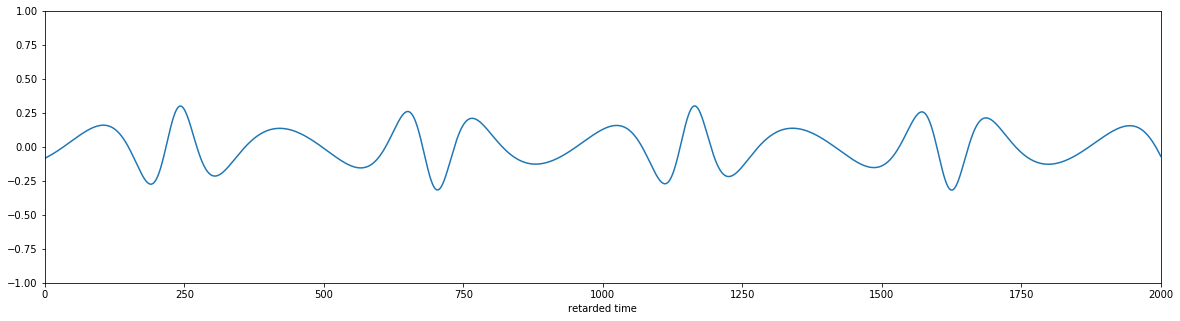

In [13]:
#read GW data, see Gwave.ipynb for details
spin=0.5;
d1=0;

#Observation angle, will be used to transform hbar to hTT 
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad

r0=20
E=0.968693
Lz=4.077016

print(r0,E)
try:
    index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt \
('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\
\\trace_spin%.6f_d1%.6f_r0%.6f_E%.6f_Lz%.6f.dat'%(spin,d1,r0,E,Lz),unpack=True)
except:
    print('trace_spin%.6f_d1%.6f_r0%.6f_E%.6f.dat  does not exist'%(spin,d1,r0,E))
    quit()

#qseudo_flat spacetime
x=[];
y=[];
z=[];
t_tau_dot=[]
z_tau_dot=[]
y_tau_dot=[]
x_tau_dot=[]
z_t_dot=[]
y_t_dot=[]
x_t_dot=[]
vr_tau_dot=[]
vth_tau_dot=[]
vphi_tau_dot=[]
vx_tau_dot=[]
vy_tau_dot=[]
vz_tau_dot=[]
x_t_2dot=[]
y_t_2dot=[]
z_t_2dot=[]


for i in np.arange(index.size):
    x.append(r[i]*np.sin(th[i])*np.cos(phi[i]));
    y.append(r[i]*np.sin(th[i])*np.sin(phi[i]));
    z.append(r[i]*np.cos(th[i]));
    t_tau_dot.append(ut[i])
    x_tau_dot.append(ur[i]*np.sin(th[i])*np.cos(phi[i]) + r[i]*np.cos(th[i])*np.cos(phi[i])*uth[i] - r[i]*np.sin(th[i])*np.sin(phi[i])*uphi[i] )
    y_tau_dot.append(ur[i]*np.sin(th[i])*np.sin(phi[i]) + r[i]*np.cos(th[i])*np.sin(phi[i])*uth[i] + r[i]*np.sin(th[i])*np.cos(phi[i])*uphi[i] )
    z_tau_dot.append(ur[i]*np.cos(th[i]) - r[i]*np.sin(th[i])*uth[i])
    x_t_dot.append(x_tau_dot[i]/t_tau_dot[i])
    y_t_dot.append(y_tau_dot[i]/t_tau_dot[i])
    z_t_dot.append(z_tau_dot[i]/t_tau_dot[i])
    
    vr_tau_dot.append( (F_r[i]*t_tau_dot[i]-ur[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
    vth_tau_dot.append( (F_th[i]*t_tau_dot[i]-uth[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
    vphi_tau_dot.append( (F_phi[i]*t_tau_dot[i]-uphi[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
    
    vx_tau_dot.append( vr_tau_dot[i]*np.sin(th[i])*np.cos(phi[i]) + ur[i]/ut[i]*np.cos(th[i])*np.cos(phi[i])*uth[i] - ur[i]/ut[i]*np.sin(th[i])*np.sin(phi[i])*uphi[i]\
         + ur[i]*cos(th[i])*cos(phi[i])*uth[i]/ut[i] - r[i]*sin(th[i])*cos(phi[i])*uth[i]/ut[i]*uth[i] -r[i]*cos(th[i])*sin(phi[i])*uth[i]/ut[i]*uphi[i] +r[i]*cos(th[i])*cos(phi[i])*vth_tau_dot[i]  \
         - ur[i]*sin(th[i])*sin(phi[i])*uphi[i]/ut[i] - r[i]*cos(th[i])*sin(phi[i])*uphi[i]/ut[i]*uth[i] - r[i]*sin(th[i])*cos(phi[i])*uphi[i]/ut[i]*uphi[i] - r[i]*sin(th[i])*sin(phi[i])*vphi_tau_dot[i])
    
    vy_tau_dot.append( vr_tau_dot[i]*np.sin(th[i])*np.sin(phi[i]) + ur[i]/ut[i]*np.cos(th[i])*np.sin(phi[i])*uth[i] + ur[i]/ut[i]*np.sin(th[i])*np.cos(phi[i])*uphi[i]\
         + ur[i]*cos(th[i])*sin(phi[i])*uth[i]/ut[i] - r[i]*sin(th[i])*sin(phi[i])*uth[i]/ut[i]*uth[i] +r[i]*cos(th[i])*cos(phi[i])*uth[i]/ut[i]*uphi[i] +r[i]*cos(th[i])*sin(phi[i])*vth_tau_dot[i]  \
         + ur[i]*sin(th[i])*cos(phi[i])*uphi[i]/ut[i] + r[i]*cos(th[i])*cos(phi[i])*uphi[i]/ut[i]*uth[i] - r[i]*sin(th[i])*sin(phi[i])*uphi[i]/ut[i]*uphi[i] + r[i]*sin(th[i])*cos(phi[i])*vphi_tau_dot[i])
    
    vz_tau_dot.append( vr_tau_dot[i]*cos(th[i]) -ur[i]/ut[i]*sin(th[i])*uth[i] \
                     -ur[i]*sin(th[i])*uth[i]/ut[i] -r[i]*cos(th[i])*uth[i]/ut[i]*uth[i] - r[i]*sin(th[i])*vth_tau_dot[i] )
    
    x_t_2dot.append(vx_tau_dot[i]/ut[i])
    y_t_2dot.append(vy_tau_dot[i]/ut[i])
    z_t_2dot.append(vz_tau_dot[i]/ut[i])
    
#四极矩算法，在trace-reversed gauge的metric

hbar_xx=[]
hbar_yy=[]
hbar_zz=[]
hbar_xy=[]
hbar_yz=[]
hbar_xz=[]
for i in np.arange(index.size):
    hbar_xx.append(4*(x_t_dot[i]*x_t_dot[i]+x[i]*x_t_2dot[i]))
    hbar_yy.append(4*(y_t_dot[i]*y_t_dot[i]+y[i]*y_t_2dot[i]))
    hbar_zz.append(4*(z_t_dot[i]*z_t_dot[i]+z[i]*z_t_2dot[i]))
    hbar_xy.append(2*(y[i]*x_t_2dot[i]+y_t_2dot[i]*x[i]+2*y_t_dot[i]*x_t_dot[i]))
    hbar_yz.append(2*(y[i]*z_t_2dot[i]+y_t_2dot[i]*z[i]+2*y_t_dot[i]*z_t_dot[i]))
    hbar_xz.append(2*(z[i]*x_t_2dot[i]+z_t_2dot[i]*x[i]+2*z_t_dot[i]*x_t_dot[i]))
    
#由trace-reversed gauge转换到transverse traceless gauge

hTT_TT=[]
hTT_PP=[]
hTT_TP=[]
hTT_plus=[]
hTT_cross=[]

for i in np.arange(index.size):
    
    
    hTT_TT.append( np.cos(THETA)*np.cos(THETA)* (hbar_xx[i]*np.cos(PHI)*np.cos(PHI) + hbar_xy[i]*np.sin(2*PHI) + hbar_yy[i]*np.sin(PHI)*np.sin(PHI) )  +  hbar_zz[i]*np.sin(THETA)*np.sin(THETA)  -  np.sin(2*THETA)* (hbar_xz[i]*np.cos(PHI)+hbar_yz[i]*np.sin(PHI))  )
    hTT_TP.append( np.cos(THETA)* (-0.5*hbar_xx[i]*np.sin(2*PHI) + hbar_xy[i]*np.cos(2*PHI) + 0.5*hbar_yy[i]*np.sin(2*PHI))  +  np.sin(THETA)* (hbar_xz[i]*np.sin(PHI)-hbar_yz[i]*np.cos(PHI)) )
    hTT_PP.append( hbar_xx[i]*np.sin(PHI)*np.sin(PHI)  -  hbar_xy[i]*np.sin(2*PHI)  +  hbar_yy[i]*np.cos(PHI)*np.cos(PHI) )
    hTT_plus.append(0.5*(hTT_TT[i]-hTT_PP[i]))
    hTT_cross.append(hTT_TP[i])
    
fig=plt.figure()
fig.set_size_inches(20, 5)
plt.xlim(0,2000)
plt.ylim(-1,1)
plt.plot(t,hTT_plus)
plt.xlabel('retarded time')

In [14]:
#注意上面算出来的h还要*mu（mass ratio）/R（观测距离，也以M为单位）才是真的strain
#发现一个小问题，上面定义的数据类型大部分都是list，但是array才比较好用
#还要注意一点几何单位制和SI单位的转换

########转换单位
Grav=6.674e-11 #引力常数
clight=2.998e8 #光速
Msol=1.989e30  #太阳质量，以千克做单位

M=1e6 # clight*clight*clight/Grav/Msol/1 #中心天体质量，以太阳质量为单位

#把时间转换成秒
t_sec=t*M*Msol*Grav/clight/clight/clight
dt=t_sec[1]-t_sec[0]

#把pc距离转换成M为单位
R_pc=5e9  #以pc为单位的观测距离
R=R_pc*3.0857e16*clight*clight/Grav/M/Msol  #以中心天体质量为单位的，长度米与中心天体质量的换算是 1m/kg = clight*clight/G

#小天体的质量
mu=1e-5 #应该是以中心天体质量为单位的

hTT_plus_true=np.array(hTT_plus)*mu/R
hTT_cross_true=np.array(hTT_cross)*mu/R

########用于计算的波形，plus作为实部，cross作为虚部
mydata=hTT_plus_true+hTT_cross_true[i]

#采样频率
fs=1/dt

#做傅里叶变换，注意要除以采样频率才是真的amplitude
mytemp_fft=np.fft.fft(mydata)/fs

#变换后的频率序列,注意，只有前一半是正的频率
freq=np.fft.fftfreq(len(mydata),dt)

Text(0.5,0,'retarded time')

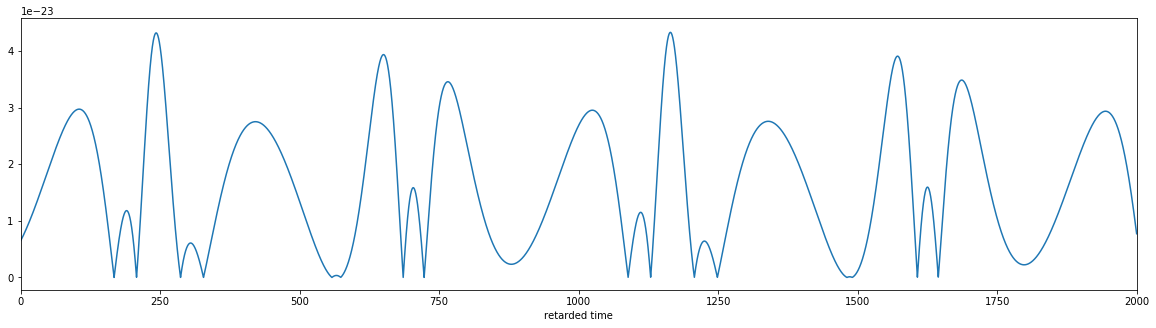

In [17]:
fig=plt.figure()
fig.set_size_inches(20, 5)
plt.xlim(0,2000)
#plt.ylim(-1,1)
plt.plot(t,np.abs(mydata))
plt.xlabel('retarded time')

In [28]:
def bracket(mydata,mytemp,dt):

    
    #两个时间序列长度要一样
    if len(mydata) != len(mytemp):
        print("inner product: length not match!")
        return

    #采样频率
    fs=1/dt

    #做傅里叶变换，注意要除以采样频率才是真的amplitude
    mydata_fft=np.fft.fft(mydata)/fs
    mytemp_fft=np.fft.fft(mytemp)/fs
    #变换后的频率序列,注意，只有前一半是正的频率
    freq=np.fft.fftfreq(len(mydata),dt)
    
    
    ##########LISA noise, reference: https://arxiv.org/abs/gr-qc/0607007v2
    u=2*np.pi*freq*50/3 #见reference（36）上面一段
    Sn=[]  #LISA noise
    for i in np.arange(freq.size/2):
        i=int(i)
        if i==0:
            Sn.append(1e10)
        elif(u[i]<0.25):
            Sn.append(8.08e-48/((2*np.pi*freq[i])**4) +5.52e-41 )
        else :
            Sn.append( (2.88e-48/((2*np.pi*freq[i])**4) +5.52e-41 ) *u[i]*u[i]/ ( (1+cos(u[i])*cos(u[i]) )*(1.0/3.0-2.0/u[i]/u[i]) + sin(u[i])**2 + 4*sin(u[i])*cos(u[i])/(u[i]**3) ) )


    ###########SNR
    SNR=0
    SNspec=[]
    df=freq[1]-freq[0]
    for i in np.arange(freq.size/2):
        i=int(i)
        SNspec.append(( mydata_fft[i]*np.conjugate(mytemp_fft[i]) + np.conjugate(mydata_fft[i])*mytemp_fft[i])/(Sn[i]))
        SNR=SNR+SNspec[i]*df
    #if len(SNspec)%2 == 0 :
        #plt.loglog(freq[np.arange(int(freq.size/2))],np.abs(SNspec))
    #else:
        #plt.loglog(freq[np.arange(1+int(freq.size/2))],np.abs(SNspec))
    #plt.xlim(1e-4,1e-1)
    #plt.ylim(1e-7*np.max(np.abs(SNspec)),np.max(np.abs(SNspec)))
    #print(SNR)
    return np.abs(SNR)

In [29]:
bracket(mydata,mydata,dt)

0.0091311482158838286

In [ ]:

f=h5py.File("test.hdf5","r+")
kerrbank=f['Kerr']
maxMatch=0

for tmpname in kerrbank.keys():
    overlap=bracket(kerrbank[tmpname],mydata,dt)/(np.sqrt(bracket(kerrbank[tmpname],kerrbank[tmpname],dt)) * np.sqrt(bracket(mydata,mydata,dt ) ) )
    if overlap>maxMatch:
        maxMatch=overlap
        for i in kerrbank[tmpname].attrs:
            print(i+": %f"%(kerrbank[tmpname].attrs[i]))


f.close()

r05.000000
E0.920000
spin0.500000
t00.000000
phi00.000000
th01.570796
ur00.000000
uth00.000000
r05.500000
E0.940000
spin0.500000
t00.000000
phi00.000000
th01.570796
ur00.000000
uth00.000000
r012.500000
E0.910000
spin0.500000
t00.000000
phi00.000000
th01.570796
ur00.000000
uth00.000000
r012.500000
E0.950000
spin0.500000
t00.000000
phi00.000000
th01.570796
ur00.000000
uth00.000000
r012.500000
E0.960000
spin0.500000
t00.000000
phi00.000000
th01.570796
ur00.000000
uth00.000000
r012.500000
E0.980000
spin0.500000
t00.000000
phi00.000000
th01.570796
ur00.000000
uth00.000000


In [44]:
for i in f.keys():
    print(i)
f.close()

Kerr


In [ ]:
#注意上面算出来的h还要*mu（mass ratio）/R（观测距离，也以M为单位）才是真的strain
#发现一个小问题，上面定义的数据类型大部分都是list，但是array才比较好用
#还要注意一点几何单位制和SI单位的转换

########转换单位
Grav=6.674e-11 #引力常数
clight=2.998e8 #光速
Msol=1.989e30  #太阳质量，以千克做单位

M=1e6 # clight*clight*clight/Grav/Msol/1 #中心天体质量，以太阳质量为单位

#把时间转换成秒
t_sec=t*M*Msol*Grav/clight/clight/clight
dt=t_sec[1]-t_sec[0]

#把pc距离转换成M为单位
R_pc=5e9  #以pc为单位的观测距离
R=R_pc*3.0857e16*clight*clight/Grav/M/Msol  #以中心天体质量为单位的，长度米与中心天体质量的换算是 1m/kg = clight*clight/G

#小天体的质量
mu=1e-5 #应该是以中心天体质量为单位的

hTT_plus_true=np.array(hTT_plus)*mu/R
hTT_cross_true=np.array(hTT_cross)*mu/R

########用于计算的波形，plus作为实部，cross作为虚部
mydata=hTT_plus_true+hTT_cross_true[i]

#采样频率
fs=1/dt

#做傅里叶变换，注意要除以采样频率才是真的amplitude
mytemp_fft=np.fft.fft(mytemp)/fs

#变换后的频率序列,注意，只有前一半是正的频率
freq=np.fft.fftfreq(len(mytemp),dt)